# WaveNet Sample Generation
Fast generation of samples from a pretrained WaveNet model

In [1]:
from model import WaveNetModel, Optimizer, WaveNetData

import torch
import numpy as np
import time

from IPython.display import Audio
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display

%matplotlib notebook

## Load Model

In [2]:
train_sample = "train_samples/saber.wav"
parameters = "model_parameters/saber_10-2-128-32-8"
layers = 10
blocks = 2
classes = 128
hidden_channels = 32
kernel_size = 8

use_cuda = torch.cuda.is_available()

In [3]:
model = WaveNetModel(num_layers=layers,
                     num_blocks=blocks,
                     num_classes=classes,
                     hidden_channels=hidden_channels,
                     kernel_size=kernel_size)

if use_cuda:
    model.cuda()
    print("use cuda")
    
model.load_state_dict(torch.load(parameters))
print("parameter count: ", model.parameter_count())

data = WaveNetData(train_sample,
                   input_length=model.scope,
                   target_length=model.last_block_scope,
                   num_classes=model.num_classes,
                   cuda=use_cuda)

parameter count:  180608


<IPython.core.display.Javascript object>


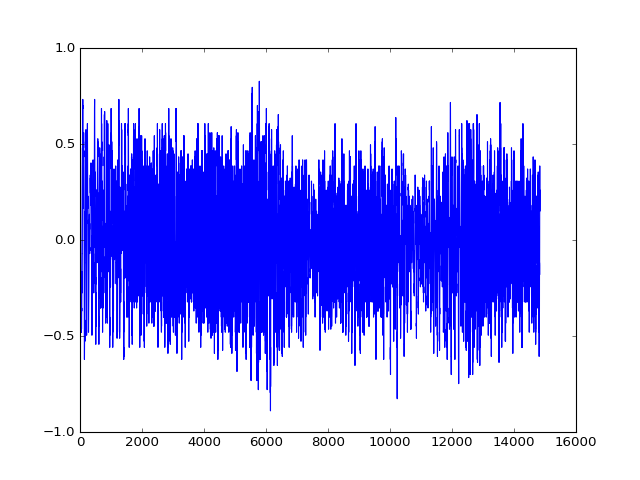

In [4]:
start_data = data.get_minibatch([model.scope])[0].squeeze()
#start_tensor = torch.zeros((model.scope)) + 0.0

plt.plot(start_data.numpy())

## Generate Samples

In [11]:
num_samples = 30000 # number of samples that will be generated
sample_rate = 11025
out_file = "generated_samples/saber_10-2-128-32-8.wav"

In [9]:
from ipywidgets import FloatProgress
from IPython.display import display
progress = FloatProgress(min=0, max=100)
display(progress)

def p_callback(i, total):
    progress.value += 1

tic = time.time()
generated_sample = model.fast_generate(num_samples, 
                                       first_samples=start_data,
                                       #first_samples=torch.zeros((1)),
                                       progress_callback=p_callback,
                                       sampled_generation=True)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

Generating took 182.8455228805542 seconds.


<IPython.core.display.Javascript object>


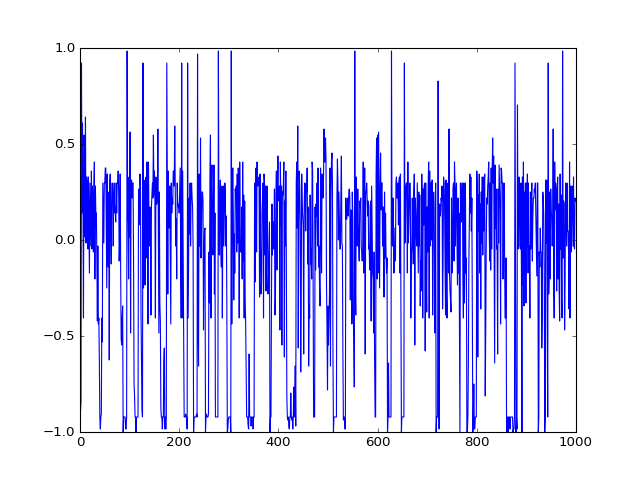

In [10]:
fig = plt.figure()
plt.plot(generated_sample[0:1000])

from IPython.display import Audio
Audio(generated_sample, rate=sample_rate)

In [12]:
np_sample = np.asarray(generated_sample)

from scipy.io import wavfile
wavfile.write(out_file, 11025, np_sample)

end

In [12]:
print('generate...')
tic = time.time()
#generated = model.generate(start_data=start_tensor, num_generate=100)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

fig = plt.figure()
plt.plot(np.asarray(generated[-100:]))

generate...
Generating took 4.506111145019531e-05 seconds.


<IPython.core.display.Javascript object>

NameError: name 'generated' is not defined

In [ ]:
from ipywidgets import FloatProgress
from IPython.display import display
progress = FloatProgress(min=0, max=100)
display(progress)

def p_callback(i, total):
    progress.value += 1

sample_length = 44100

tic = time.time()
#[generated_sample, support_generated] = model.fast_generate(sample_length, first_samples=torch.zeros((1))+0.1)
generated_sample = model.fast_generate(sample_length, 
                                       #first_samples=start_tensor,
                                       first_samples=torch.zeros((1)),
                                       progress_callback=p_callback)
toc = time.time()
print('Generating took {} seconds.'.format(toc-tic))

In [ ]:
fig = plt.figure()
plt.plot(generated_sample[0:1000])

from IPython.display import Audio
Audio(generated_sample, rate=11025)

In [ ]:
np_sample = np.asarray(generated_sample)
print("sample: ", np_sample)

from scipy.io import wavfile
wavfile.write('generated_bach_11025_sample_12_layers.wav', 11025, np_sample)